# Adding Necessary includes for data analysis 

In [1]:
from scipy.stats.mstats import mode
import pandas as pd
import numpy as np

# load libraries and set styles, options for plotting and other data analysis needs 

import warnings; warnings.simplefilter('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

# from pandas import set_option
# set_option("display.max_rows", 16)

# LARGE_FIGSIZE = (12, 8)

from ipywidgets import interact
from ipywidgets import widgets

%matplotlib inline

# ^^^^^ https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/ 

In [2]:
# Change the directory to the one where your files are located 

%cd /home/zackymo/Desktop/ZachNewCalcTextFiles

/home/zackymo/Desktop/ZachNewCalcTextFiles


# Read in the necessary data that was created from the main script

In [3]:
# Read in data

modeAnaDF = pd.read_table('QueensAndBreedSumsAtModeSens.txt', sep = ',')

# Rename columns 

modeAnaDF.columns = ['Queen1isWithMode','Queen2isWithMode','BreedMaleisWithMode', 'Tot']

# Dislay the dataset

modeAnaDF.head()

,Queen1isWithMode,Queen2isWithMode,BreedMaleisWithMode,Tot
0,1001,1074,2459,3313
1,3246,3050,1638,7490
2,3445,1706,0,10321
3,2724,648,886,5528
4,31,5761,4250,7449


# Graphing the raw counts that each specific animal spent with the majority of other animals from Window 700 - 800 

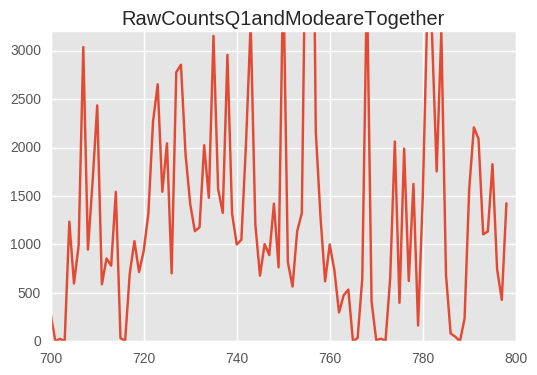

In [4]:
# Plot raw counts over time of how often Queen1 was with the Mode

aa = modeAnaDF['Queen1isWithMode'].plot(xlim = (700,800), ylim = (0,3200), title = 'RawCountsQ1andModeareTogether')
fig = aa.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ1andModeareTogether.png')

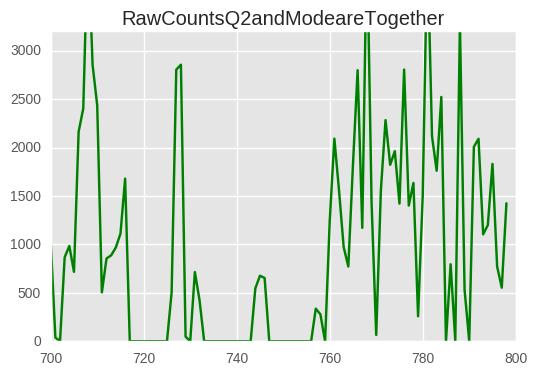

In [5]:
ab = modeAnaDF['Queen2isWithMode'].plot(xlim = (700,800), ylim = (0,3200), title = 'RawCountsQ2andModeareTogether', color = 'g')
fig = ab.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ2andModeareTogether.png')

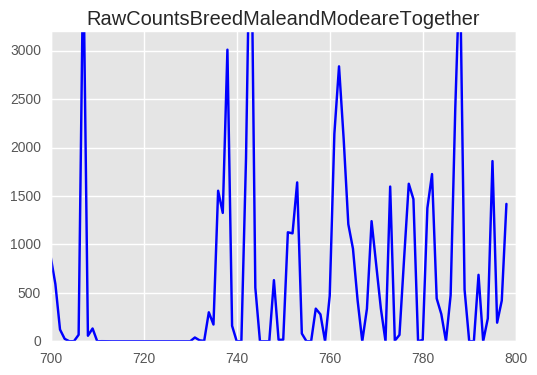

In [6]:
ac = modeAnaDF['BreedMaleisWithMode'].plot(xlim = (700,800), ylim = (0,3200), title = 'RawCountsBreedMaleandModeareTogether', color = 'b')
fig = ac.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsBreedMaleandModeareTogether.png')

# Graphing the percentages of time each specific animal spent with the majority of other animals 

In [4]:
modeAnaDF['PercentageofTimeQ1andModeareTogether'] = (modeAnaDF['Queen1isWithMode']/modeAnaDF['Tot'])*100

modeAnaDF['PercentageofTimeQ2andModeareTogether'] = (modeAnaDF['Queen2isWithMode']/modeAnaDF['Tot'])*100

modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'] = (modeAnaDF['BreedMaleisWithMode']/modeAnaDF['Tot'])*100

modeAnaDF.head()

,Queen1isWithMode,Queen2isWithMode,BreedMaleisWithMode,Tot,PercentageofTimeQ1andModeareTogether,PercentageofTimeQ2andModeareTogether,PercentageofTimeBreedMaleandModeareTogether
0,1001,1074,2459,3313,30.214307,32.417748,74.222759
1,3246,3050,1638,7490,43.337784,40.720961,21.869159
2,3445,1706,0,10321,33.378549,16.529406,0.000000
3,2724,648,886,5528,49.276411,11.722142,16.027496
4,31,5761,4250,7449,0.416163,77.339240,57.054638


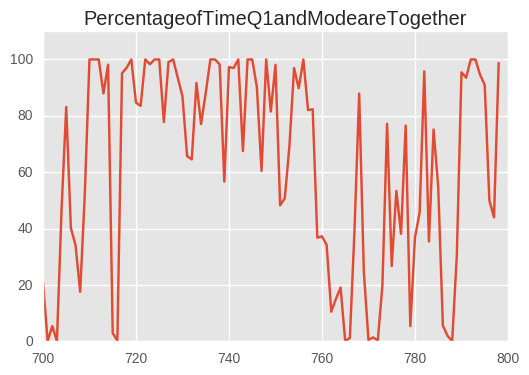

In [8]:
ax = modeAnaDF['PercentageofTimeQ1andModeareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andModeareTogether')
fig = ax.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ1andModeareTogether.png')

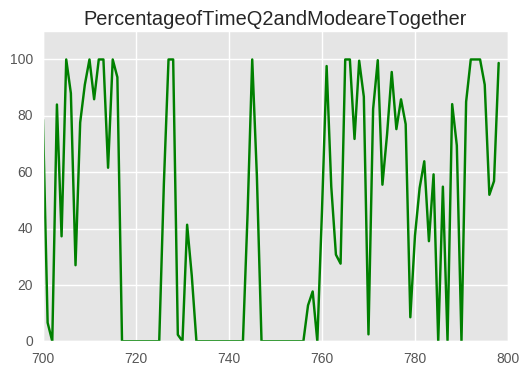

In [9]:
ay = modeAnaDF['PercentageofTimeQ2andModeareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ2andModeareTogether', color = 'g')
fig = ay.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQueen2andModeareTogether.png')


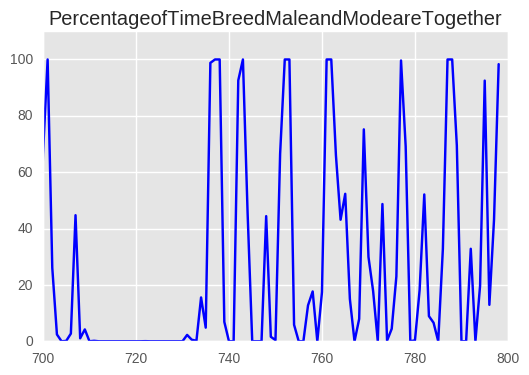

In [10]:
az = modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeBreedMaleandModeareTogether', color = 'b')
fig = az.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeBreedMaleandModeareTogether.png')

# EXPERIMENTATION

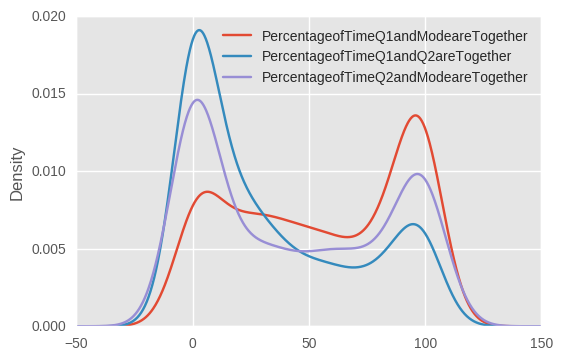

In [11]:
# The KDE plot is a smoothed out version of the histogram. The probabiliy densities are on the y axis 

modeAnaDF['PercentageofTimeQ1andModeareTogether'].plot( kind = 'kde', legend = True)

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].plot( kind = 'kde', legend = True)

modeAnaDF['PercentageofTimeQ2andModeareTogether'].plot( kind = 'kde', legend = True)

# Find out how to add a legend to the graph, this is the kde graph over all windows for those specific columns 
# They're pretty similar actually

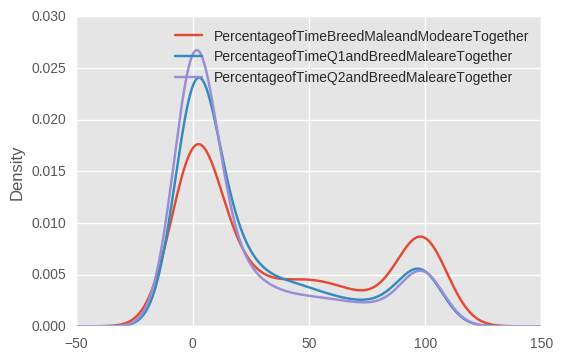

In [13]:
modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].plot(kind = 'kde', legend = True)

modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].plot(kind = 'kde', legend = True)

modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].plot(kind = 'kde', legend = True)

# Need to understand wtf these graphs mean 

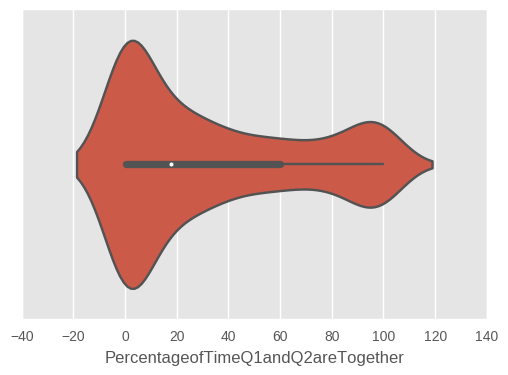

In [47]:
sns.violinplot(x = modeAnaDF1['PercentageofTimeQ1andQ2areTogether'])

# Figure out how to plot this thing and what it means. I beleive it shows the distribution of the data.
# Mimics the KDE plot 



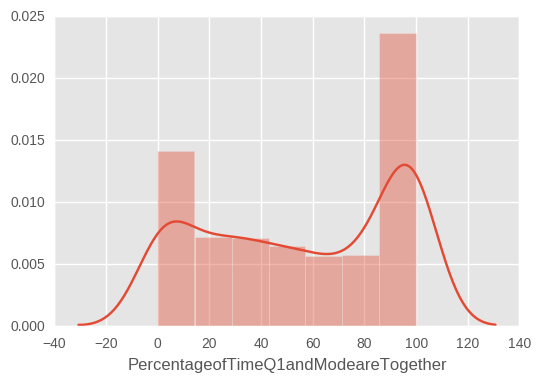

In [7]:
sns.distplot(modeAnaDF['PercentageofTimeQ1andModeareTogether'])

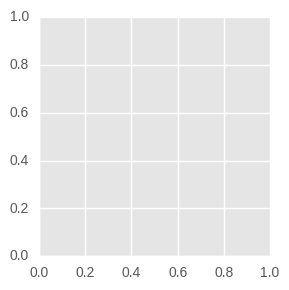

In [9]:
fig = sns.FacetGrid(<nameofdataset>, hue='varInDataset', aspect=4)
fig.map(sns.kdeplot, 'varInDataset', shade = True)
newvarname = dataSetName['varInDataset'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [10]:
modeAnaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 7 columns):
Queen1isWithMode                               799 non-null int64
Queen2isWithMode                               799 non-null int64
BreedMaleisWithMode                            799 non-null int64
Tot                                            799 non-null int64
PercentageofTimeQ1andModeareTogether           799 non-null float64
PercentageofTimeQ2andModeareTogether           799 non-null float64
PercentageofTimeBreedMaleandModeareTogether    799 non-null float64
dtypes: float64(3), int64(4)
memory usage: 43.8 KB


In [11]:
modeAnaDF['PercentageofTimeQ1andModeareTogether'].describe()

count    799.000000
mean      55.551589
std       36.780171
min        0.000000
25%       21.339528
50%       57.312723
75%       93.995180
max      100.000000
Name: PercentageofTimeQ1andModeareTogether, dtype: float64

In [12]:
modeAnaDF['PercentageofTimeQ1andModeareTogether'].median()

57.31272294887039

In [13]:
modeAnaDF['PercentageofTimeQ2andModeareTogether'].describe()

count    799.000000
mean      43.225695
std       40.090143
min        0.000000
25%        0.000000
50%       35.519677
75%       87.268852
max      100.000000
Name: PercentageofTimeQ2andModeareTogether, dtype: float64

In [14]:
modeAnaDF['PercentageofTimeQ2andModeareTogether'].median()

35.51967709384461

In [15]:
modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].describe()

count    799.000000
mean      37.319926
std       39.872851
min        0.000000
25%        0.000000
50%       18.466061
75%       76.750272
max      100.000000
Name: PercentageofTimeBreedMaleandModeareTogether, dtype: float64

In [16]:
modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].median()

18.466060929983964

# Graphing the raw counts over time a specific animal spent with one another 

In [5]:
modeAnaDF1 = pd.read_table('QueensAndBreedSumsWithOneAnother.txt', sep = ',')

modeAnaDF1.columns = ['Queen1isWithQueen2','Queen1isWithBreedMale','Queen2isWithBreedMale', 'Tot']

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'] = (modeAnaDF1['Queen1isWithQueen2']/modeAnaDF1['Tot'])*100

modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'] = (modeAnaDF1['Queen1isWithBreedMale']/modeAnaDF1['Tot'])*100

modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'] = (modeAnaDF1['Queen2isWithBreedMale']/modeAnaDF1['Tot'])*100

print(modeAnaDF1.shape)

modeAnaDF1.head()

(799, 7)


,Queen1isWithQueen2,Queen1isWithBreedMale,Queen2isWithBreedMale,Tot,PercentageofTimeQ1andQ2areTogether,PercentageofTimeQ1andBreedMaleareTogether,PercentageofTimeQ2andBreedMaleareTogether
0,170,1444,246,3313,5.131301,43.585874,7.425294
1,67,39,1652,7490,0.894526,0.520694,22.056075
2,453,0,10,10321,4.389110,0.000000,0.096890
3,111,37,266,5528,2.007959,0.669320,4.811867
4,84,35,3391,7449,1.127668,0.469862,45.522889


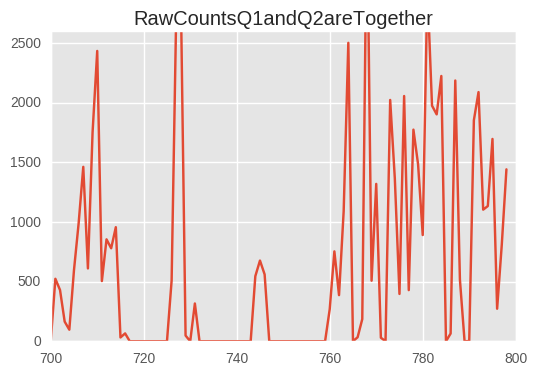

In [18]:
ad = modeAnaDF1['Queen1isWithQueen2'].plot(xlim = (700,800), ylim = (0,2600), title = 'RawCountsQ1andQ2areTogether')
fig = ad.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ1andQ2areTogether.png')

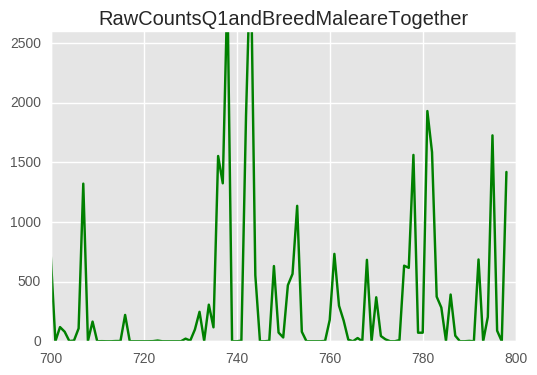

In [19]:
ae = modeAnaDF1['Queen1isWithBreedMale'].plot(xlim = (700,800), ylim = (0,2600), title = 'RawCountsQ1andBreedMaleareTogether', color = 'g')
fig = ae.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ1andBreedMaleareTogether.png')

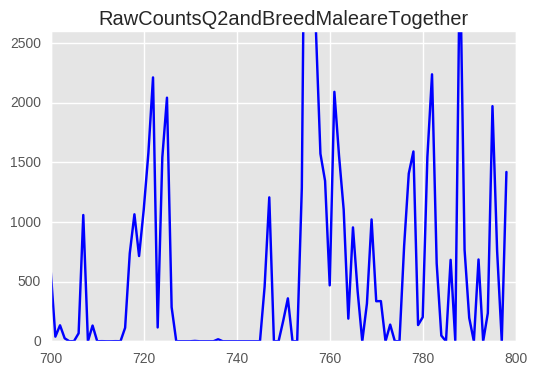

In [20]:
af = modeAnaDF1['Queen2isWithBreedMale'].plot(xlim = (700,800), ylim = (0,2600), title = 'RawCountsQ2andBreedMaleareTogether', color = 'b')
fig = af.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ2andBreedmaleareTogether.png')

# Graphing the percentage over time a specific animal spent with one another 

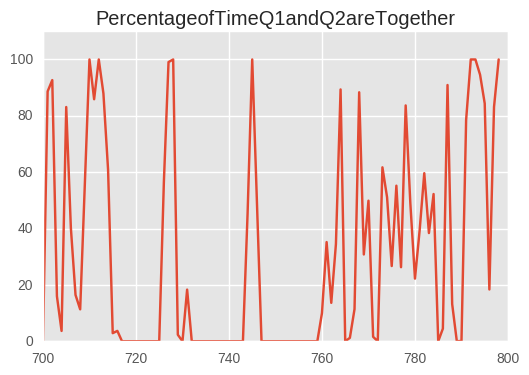

In [21]:
ag = modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andQ2areTogether')
fig = ag.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ1andQ2areTogether.png')


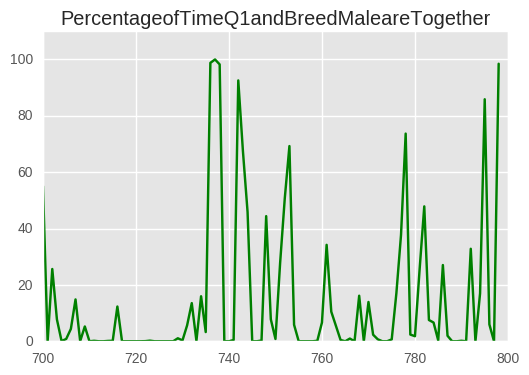

In [22]:
ah = modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andBreedMaleareTogether', color ='g')
fig = ah.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ1andBreedMaleareTogether.png')


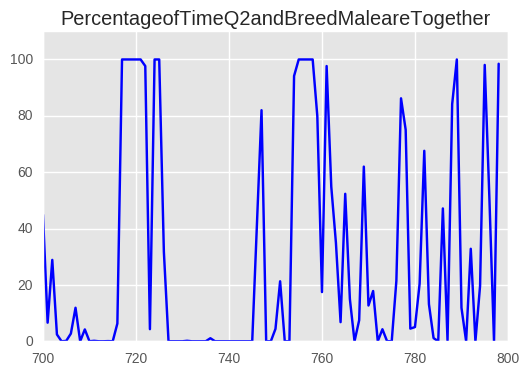

In [23]:
ai = modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ2andBreedMaleareTogether', color ='b')
fig = ai.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ2andBreedMaleareTogether.png')


# Experimentiation Round 2 

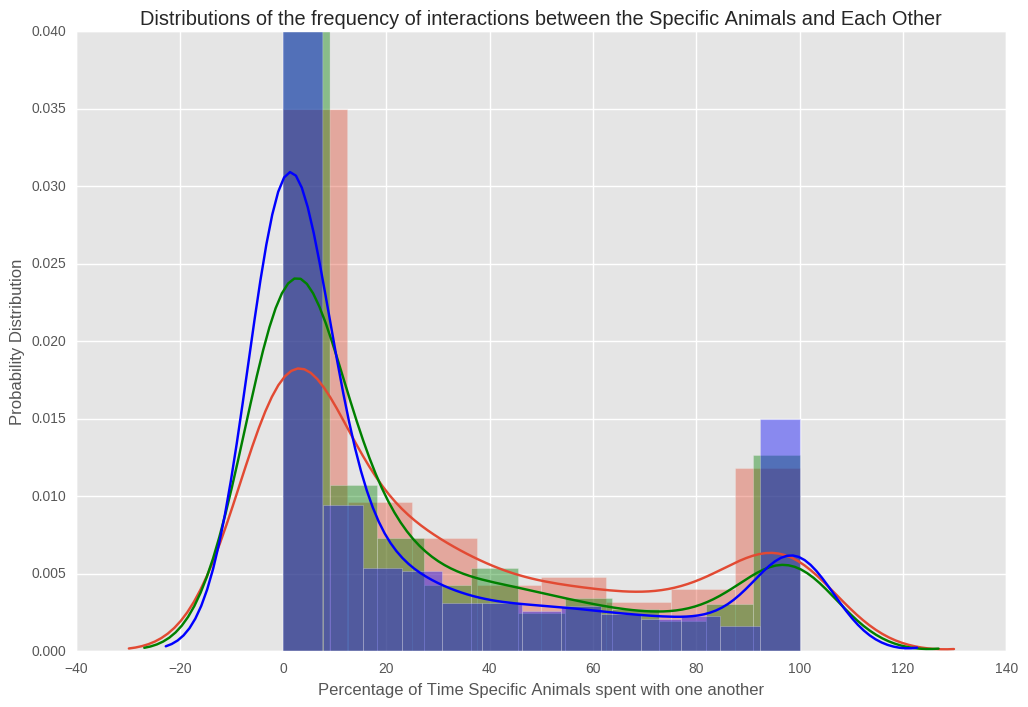

In [46]:
# # Comparing different windows 

# # Ex. of how to utilize a global variable
# # def set_globvar_to_one():
# #     global globvar 

# def compare_time_windows_hist(w1, w2, colName):
#     """
#     Insert a start window, and an end window, along with the column name you would like
#     to plot. This function will then take all three parameters, create a histogram for you, and
#     save it to your desktop!
#     """ 
#     ai = modeAnaDF1[colName].plot(xlim = (w1 , w2), ylim = (0,110), title = colName)
#     fig = ai.get_figure()
#     fig.savefig('/home/zackymo/Desktop/WeekendDists/{}Hist{}-{}.png'.format(colName, w1, w2))

# def compare_time_windows_dist(w1, w2, colName):
#     """
#     Insert a start window, and an end window, along with the column name you would like
#     to plot. This function will then take all three parameters, create a KDE plot for you, and
#     save it to your desktop!
#     """
#     ai = modeAnaDF1[colName].plot(kind = 'kde', xlim = (w1 , w2), ylim = (0,110), title = colName)
#     fig = ai.get_figure()
#     fig.savefig('/home/zackymo/Desktop/WeekendDists/{}Kde{}-{}.png'.format(colName, w1, w2))

# # colNames = ['Queen1isWithQueen2','Queen1isWithBreedMale','Queen2isWithBreedMale', 'PercentageofTimeQ1andQ2areTogether'
# # 'PercentageofTimeQ1andBreedMaleareTogether', 'PercentageofTimeQ2andBreedMaleareTogether']

specificWindowsStart = [42 , 201, 380, 546, 714]
specificWindowsFinish = [96, 272, 440, 608, 768]
modeAnaDFNames = ['PercentageofTimeQ1andModeareTogether', 'PercentageofTimeQ2andModeareTogether', 'PercentageofTimeBreedMaleandModeareTogether']
modeAnaDF1Names = ['PercentageofTimeQ1andQ2areTogether', 'PercentageofTimeQ1andBreedMaleareTogether', 'PercentageofTimeQ2andBreedMaleareTogether']

# def sliceAndDice(w1 , w2):
# #     global modeAnaDF1Names
# #     for col in modeAnaDF1Names:
#         # breh = modeAnaDF.loc[w1:w2, col]
#     breh = modeAnaDF.loc[w1:w2, modeAnaDF1Names] 

breh = modeAnaDF1.loc[0:799, modeAnaDF1Names] 

# sliceAndDice(201, 272)


# sns.distplot(breh['PercentageofTimeQ1andModeareTogether'])
# sns.distplot(breh['PercentageofTimeQ2andModeareTogether'], color = 'g')
# sns.distplot(breh['PercentageofTimeBreedMaleandModeareTogether'])

f, (ax1) = plt.subplots(1,figsize=(12,8))
sns.distplot(breh['PercentageofTimeQ1andQ2areTogether'])
sns.distplot(breh['PercentageofTimeQ1andBreedMaleareTogether'], color = 'g')
sns.distplot(breh['PercentageofTimeQ2andBreedMaleareTogether'], color = 'b')

plt.title('Distributions of the frequency of interactions between the Specific Animals and Each Other')
plt.xlabel('Percentage of Time Specific Animals spent with one another')
plt.ylim(0.000, 0.040)
plt.ylabel('Probability Distribution')
plt.savefig('/home/zackymo/Desktop/Distributions of All Specific Animals with Each Other Overall.png')

# Analysis From the Mode plots (Spec. Animals and the Mode):
# The Queen and the Mode spent THE MOST time together on the birth weekend, which is paricularly interesting. IDK wtf 
# happened on Weekend 4, that weekend is super weird 

#     plt.xlabel('Life Expectancy')
#     plt.ylabel('Number of Countries')
#     plt.title(str(year1) + " vs " + str(year2))

# for col in colNames:
#     compare_time_windows_hist(42, 96, col)
#     compare_time_windows_hist(201, 272, col)
#     compare_time_windows_hist(380, 440, col)
#     compare_time_windows_hist(546, 608, col)
#     compare_time_windows_hist(714, 768, col)
    
# for col in colNames:
#     compare_time_windows_kde(42, 96, col)
#     compare_time_windows_kde(201, 272, col)
#     compare_time_windows_kde(380, 440, col)
#     compare_time_windows_kde(546, 608, col)
#     compare_time_windows_kde(714, 768, col)

# colNames = ['PercentageofTimeQ1andQ2areTogether']

# modeAnaDF1[['Per']]

# s[:5]

# sns.distplot(modeAnaDF['PercentageofTimeQ1andModeareTogether'])

# Subsetting Data by slicing rows and columns from previous dataframe and creating a new one 

# breh = modeAnaDF.loc[42:96,['PercentageofTimeQ1andModeareTogether', 'PercentageofTimeQ2andModeareTogether', 'PercentageofTimeBreedMaleandModeareTogether']]
# # modeAnaDF.loc[:,['PercentageofTimeQ1andModeareTogether'', 'A']] = df[['A', 'B']].values

# breh

# sns.distplot(modeAnaDF['PercentageofTimeQ1andModeareTogether'])
       
# Great Resource on slicing data 
# http://pandas.pydata.org/pandas-docs/stable/indexing.html    

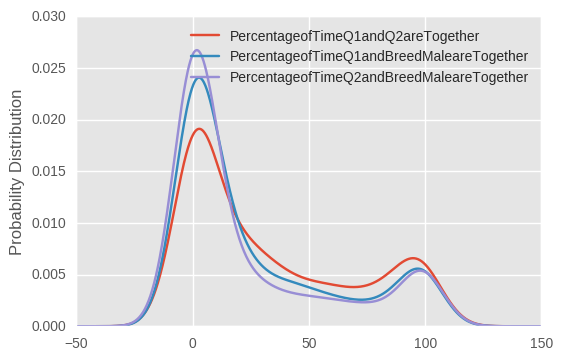

In [21]:
modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].plot(kind = 'kde', legend = True)

modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].plot(kind = 'kde', legend = True)

modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].plot(kind = 'kde', legend = True)

plt.ylabel('Probability Distribution')

# Need to understand wtf these graphs mean 

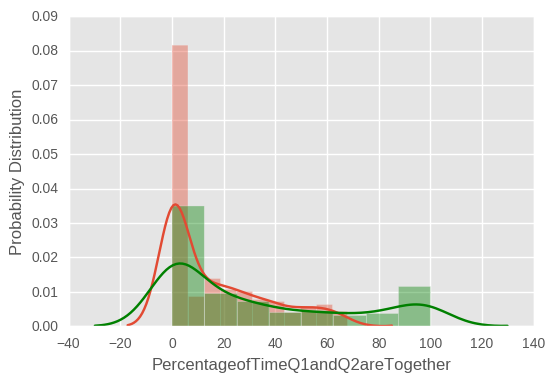

In [24]:
# Should we remove the outliers within the data? If so why or why not? 

modeAnaDF2 = modeAnaDF1[~(np.abs(modeAnaDF1.PercentageofTimeQ1andQ2areTogether-modeAnaDF1.PercentageofTimeQ1andQ2areTogether.mean())>(1*modeAnaDF1.PercentageofTimeQ1andQ2areTogether.std()))]

# There's not too many values outside 1 standard deviation from the mean
# For this specific column - 176 values were removed - From 799 -623
# Below is a distribution plot after the outliers have been removed. 
# The median is a better indicator to utilize for these distributions

sns.distplot(modeAnaDF2['PercentageofTimeQ1andQ2areTogether'])

sns.distplot(modeAnaDF1['PercentageofTimeQ1andQ2areTogether'], color = 'g')

plt.ylabel('Probability Distribution')

# modeAnaDF2['PercentageofTimeQ1andQ2areTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andBreedMaleareTogether', color ='r')



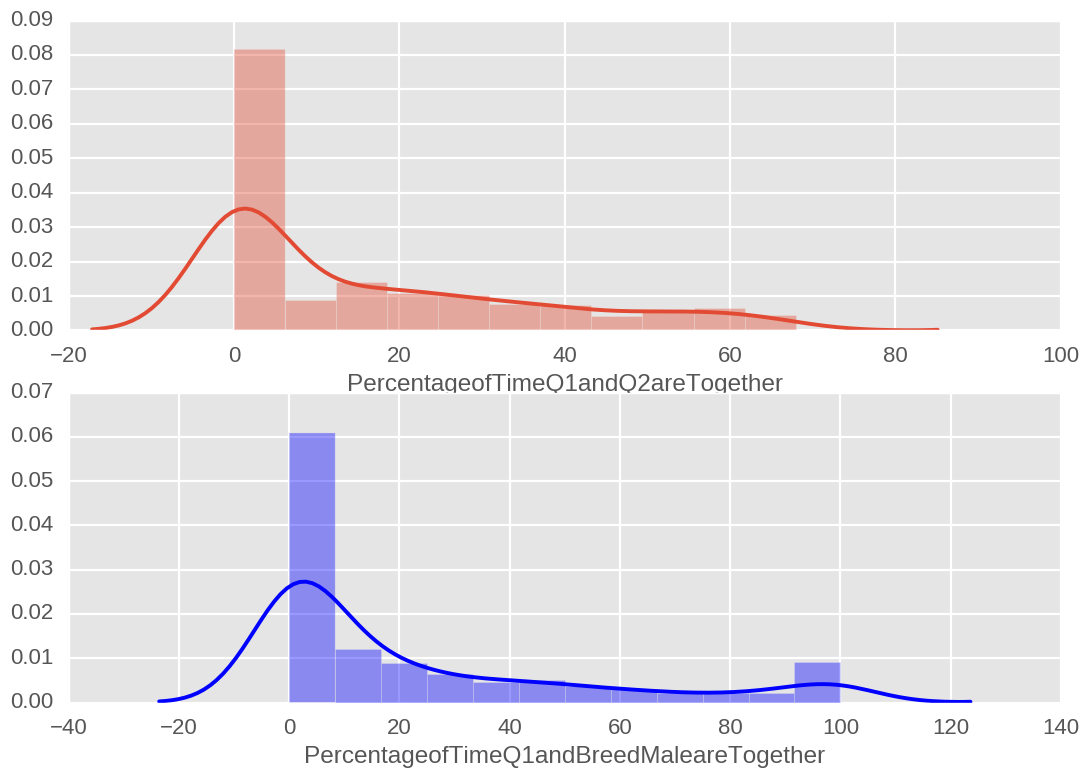

In [54]:

sns.set

sns.set_context("poster") # Can set context to talk, notebook, paper, nb is default

# The line below creates two empty plots right nunderneath each other 
f, (ax1, ax2) = plt.subplots(2)

# This generates a histogram plot with a specific column from the dataframe and places
# it onto the axis of the first plot 

sns.distplot(modeAnaDF2['PercentageofTimeQ1andQ2areTogether'], ax = ax1)

sns.distplot(modeAnaDF2['PercentageofTimeQ1andBreedMaleareTogether'], ax = ax2, color = 'b')



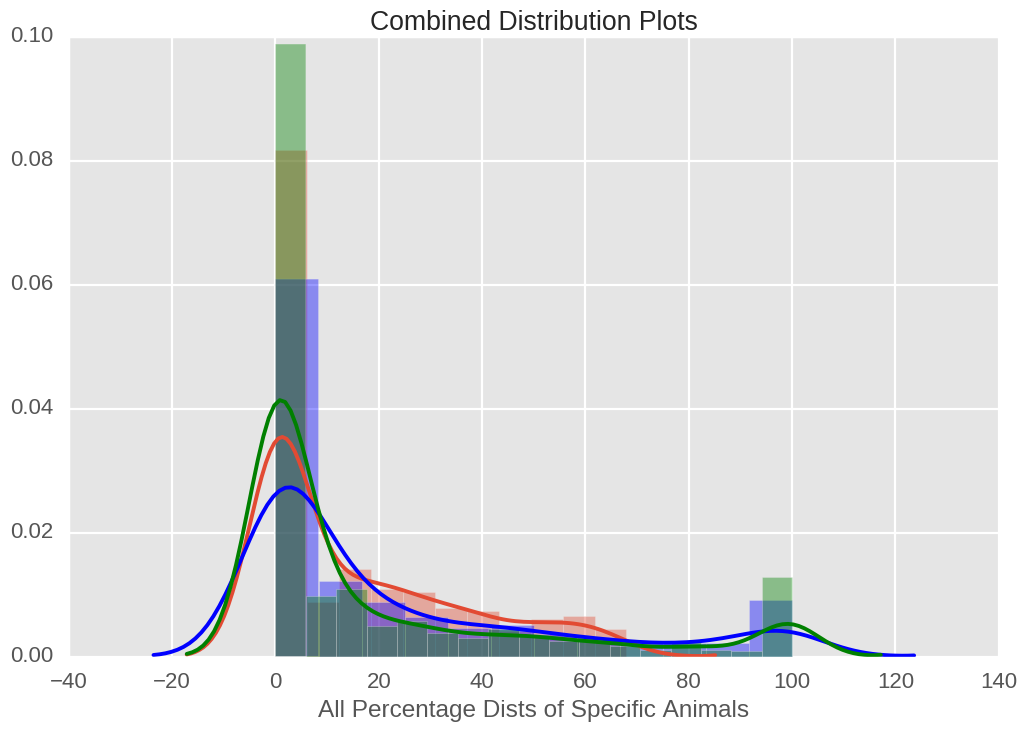

In [66]:
# compare two years in same frame

f, (ax1) = plt.subplots(1,figsize=(12,8))
sns.distplot(modeAnaDF2['PercentageofTimeQ1andQ2areTogether'], ax = ax1)
sns.distplot(modeAnaDF2['PercentageofTimeQ1andBreedMaleareTogether'], ax = ax1, color='b')
sns.distplot(modeAnaDF2['PercentageofTimeQ2andBreedMaleareTogether'], ax = ax1, color='g')

# plt.ylabel('Life Expectancy')
plt.xlabel('All Percentage Dists of Specific Animals')
plt.title("Combined Distribution Plots")

In [ ]:
# define function to compare two years in same frame

def compare_hist(year1,year2):
    f, (ax1) = plt.subplots(1,figsize=(12,8))
    sns.distplot(modeAnaDF2['PercentageofTimeQ1andQ2areTogether'], ax = ax1)
    sns.distplot(modeAnaDF2['PercentageofTimeQ1andBreedMaleareTogether'], ax = ax1, color='b')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Number of Countries')
    plt.title(str(year1) + " vs " + str(year2))

# Summary statistics of percentages over ALL 800 windows should maybe create a function to evaluate these or show these for the multile weekends 

In [24]:
# Summary statistics of percentages over ALL 800 windows should maybe create a function to evaluate these or show these 
# for the multile weekends 

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].describe()


count    799.000000
mean      32.650454
std       35.760193
min        0.000000
25%        0.274349
50%       17.935409
75%       59.863056
max      100.000000
Name: PercentageofTimeQ1andQ2areTogether, dtype: float64

In [25]:
# Additional summary statistic 

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].median()

17.935409457900807

In [26]:
# Summary statistics of percentages

modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].describe()


count    799.000000
mean      26.544480
std       34.385488
min        0.000000
25%        0.170871
50%        8.110853
75%       43.589812
max      100.000000
Name: PercentageofTimeQ1andBreedMaleareTogether, dtype: float64

In [27]:
modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].median()

8.110853163087638

In [28]:
modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].describe()

count    799.000000
mean      23.728652
std       34.587975
min        0.000000
25%        0.000000
50%        3.048350
75%       36.698117
max      100.000000
Name: PercentageofTimeQ2andBreedMaleareTogether, dtype: float64

In [29]:
modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].median()

3.048349651761381